# Model Tester

### Model Suffix to load
Load "_dddqn" as an example, you can add more models if you wish

In [1]:
model_id1 = "_dddqn"
model_id2 = None
model_id3 = None
model_id4 = None
model_id5 = None

## Settings
Custom for model testing: Full greed policy

In [2]:
from tester import ModelTester
import torch

test_config = {

    "seed": None,

    # Hiperparámetros de DDDQN
    "eps": 0,
    "eps_min": 0,
    "eps_decay": 0,
    "discount": 0.95,               # Gamma
    "learning_rate": 0.0001,
    "target_update_freq": 1000,

    # # Hiperparámetros de PER
    "buffer_size": 1000000,
    "batch_size": 32,
    "eps_td": 5e-3,
    "alpha": 0.5,
    "beta": 0.4,
    "max_beta": 1,
    "beta_increment_per_sampling": 5e-6,
    "min_priority": 1e-8 # Only to avoid 0 priority

}

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Model comparison
You can add more models if you want
### Load

In [3]:
tester = ModelTester(config=test_config, 
                     base_path= ".",
                     device=device)

tester.load_stats([model_id1, model_id2, model_id3, model_id4, model_id5])

Estamos cargando las estadísticas desde: .\training_stats_dddqn.pkl.gz


c:\Users\Joseph\Desktop\Reinforcement learning\Project\.JosephDQN\Tests\tester.py:81: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.training_data[suffix] = torch.load(f

Estadísticas de _dddqn cargadas con éxito.
Estamos cargando las estadísticas desde: .\training_statsNone.pkl.gz
Error al cargar .\training_statsNone.pkl.gz: [Errno 2] No such file or directory: '.\\training_statsNone.pkl.gz'
Estamos cargando las estadísticas desde: .\training_statsNone.pkl.gz
Error al cargar .\training_statsNone.pkl.gz: [Errno 2] No such file or directory: '.\\training_statsNone.pkl.gz'
Estamos cargando las estadísticas desde: .\training_statsNone.pkl.gz
Error al cargar .\training_statsNone.pkl.gz: [Errno 2] No such file or directory: '.\\training_statsNone.pkl.gz'
Estamos cargando las estadísticas desde: .\training_statsNone.pkl.gz
Error al cargar .\training_statsNone.pkl.gz: [Errno 2] No such file or directory: '.\\training_statsNone.pkl.gz'
Se han cargado 5 archivo(s) de estadísticas.


### Add label and plot

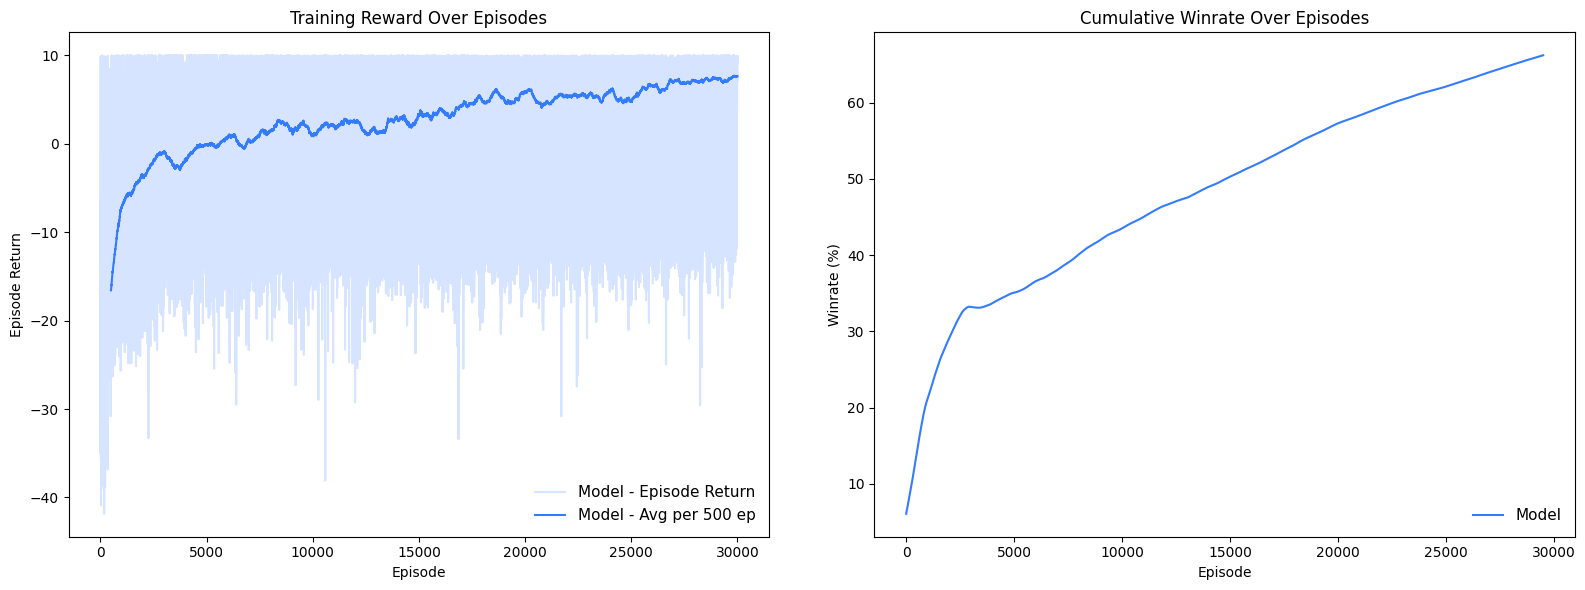

In [4]:
custom_names = ["Model"]
tester.plot_rewards_and_winrate(window_size=500, custom_names= custom_names)

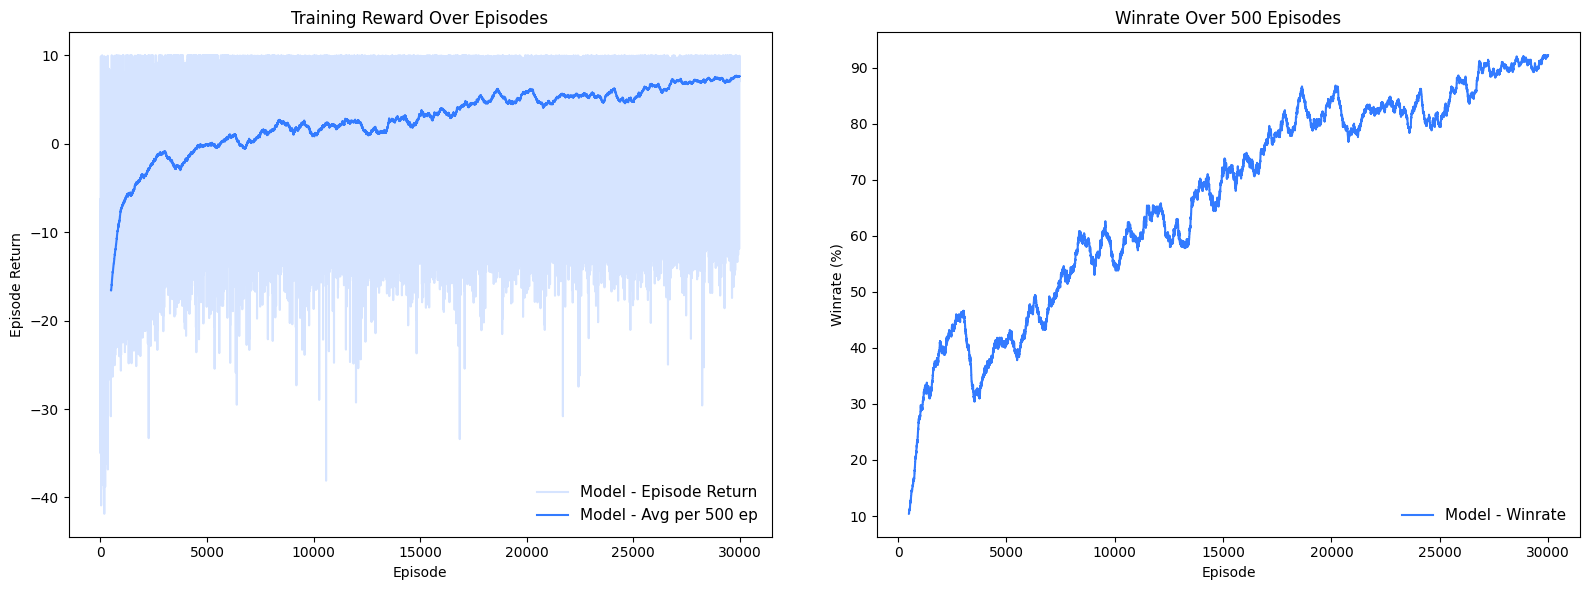

In [5]:
tester.plot_rewards_and_winrate_last_500(window_size=500, win_window=500, custom_names= custom_names)

# Individual testing

In [6]:
model_test = model_id1

In [7]:
tester = ModelTester(config=test_config, 
                     base_path= ".",
                     device=device)

tester.init_env(weak_opponent=True, render=False, random_start=True)
tester.load_stats(model_test)
tester.load_model(model_test)

Estamos cargando las estadísticas desde: .\training_stats_dddqn.pkl.gz


c:\Users\Joseph\Desktop\Reinforcement learning\Project\.JosephDQN\Tests\tester.py:62: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(f, map_location=self.de

Estadísticas de _dddqn cargadas con éxito.
Primeros valores de 'losses' en _dddqn: [0.015208465978503227, 0.0083231832832098, 0.009409066289663315, 0.008507892489433289, 0.007017864845693111]
Se han cargado 1 archivo(s) de estadísticas.
Estamos cargando el modelo desde: .\model_weights_dddqn.pth


c:\Users\Joseph\Desktop\Reinforcement learning\Project\.JosephDQN\Tests\tester.py:49: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(model_file, map_l

## Returns and winrate

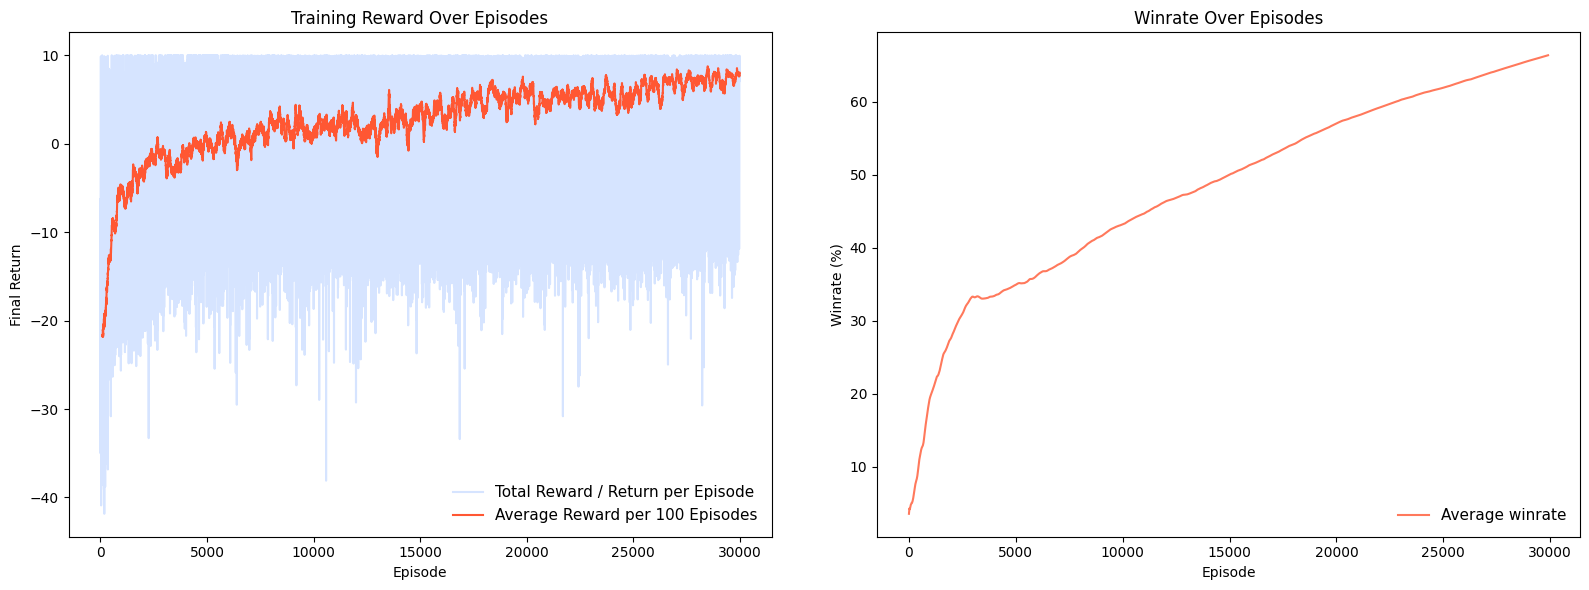

In [8]:
tester.plot_reward_and_winrate(window_size=100)

## Loss
During training

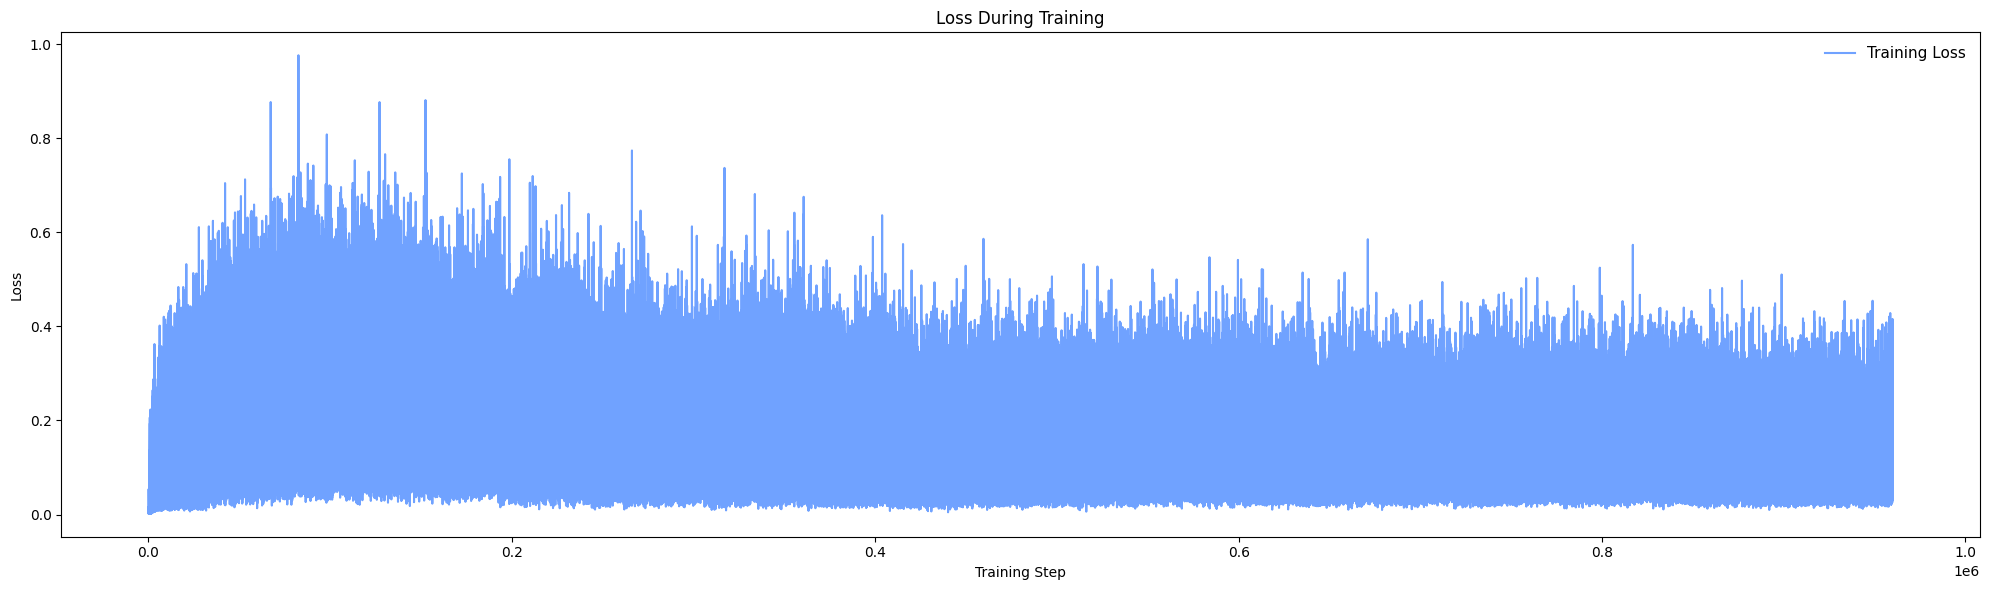

In [9]:
tester.plot_loss()

## PER
Replay buffer distribution

In [10]:
tester.plot_per_distributions()

No se encontró 'replay_buffer' en los datos.


## Play Against Strong Opponent: 1 Episode
Or weak opponent if weak_opponent=True

In [11]:
tester.init_env(weak_opponent=False, render=False, random_start=True)
tester.play_one_episode(steps=251, render=True)

## Play against human

In [12]:
tester.init_env(weak_opponent=True, render=False, random_start=True)
tester.play_vs_human(steps=3000, render=True)

Human Controls:
 left:			left arrow key left
 right:			arrow key right
 up:			arrow key up
 down:			arrow key down
 tilt clockwise:	w
 tilt anti-clockwise:	s
 shoot :	space
